# EDA with Envioscreen data # 3

#### Marshall C

### Import data from API

In [129]:
import json
import urllib.request
url = 'https://data.ca.gov/api/3/action/datastore_search?resource_id=89b3f4e9-0bf8-4690-8c6f-715a717f3fae&limit=5&q=title:jones'  
fileobj = urllib.request.urlopen(url)
response_dict = json.loads(fileobj.read())
print(response_dict)

{'help': 'https://data.ca.gov/api/3/action/help_show?name=datastore_search', 'success': True, 'result': {'include_total': True, 'resource_id': '89b3f4e9-0bf8-4690-8c6f-715a717f3fae', 'fields': [{'type': 'int', 'id': '_id'}, {'type': 'text', 'id': 'Census Tract'}, {'type': 'text', 'id': 'Total Population'}, {'type': 'text', 'id': 'California County'}, {'type': 'text', 'id': 'ZIP'}, {'type': 'text', 'id': 'Nearby City \n(to help approximate location only)'}, {'type': 'text', 'id': 'Longitude'}, {'type': 'text', 'id': 'Latitude'}, {'type': 'text', 'id': 'CES 3.0 Score'}, {'type': 'text', 'id': 'CES 3.0 Percentile'}, {'type': 'text', 'id': 'CES 3.0 \nPercentile Range'}, {'type': 'text', 'id': 'SB 535 Disadvantaged Community'}, {'type': 'text', 'id': 'Ozone'}, {'type': 'text', 'id': 'Ozone Pctl'}, {'type': 'text', 'id': 'PM2.5'}, {'type': 'text', 'id': 'PM2.5 Pctl'}, {'type': 'text', 'id': 'Diesel PM'}, {'type': 'text', 'id': 'Diesel PM Pctl'}, {'type': 'text', 'id': 'Drinking Water'}, {'ty

### Imports for the rest of the notebook

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

### Read in just the EnviroScreen #3 data

In [131]:
cal = pd.read_csv('https://data.ca.gov/dataset/0bd5f40b-c59b-4183-be22-d057eae8383c/resource/89b3f4e9-0bf8-4690-8c6f-715a717f3fae/download/calenviroscreen-3.0-results-june-2018-update.csv')

In [132]:
cal.head()

Census Tract  Total Population California County    ZIP  \
0    6019001100              3174           Fresno   93706   
1    6071001600              6133    San Bernardino  91761   
2    6019000200              3167           Fresno   93706   
3    6077000801              6692       San Joaquin  95203   
4    6019001500              2206           Fresno   93725   

  Nearby City \n(to help approximate location only)   Longitude   Latitude  \
0                                            Fresno -119.781696  36.709695   
1                                           Ontario -117.618013  34.057780   
2                                            Fresno -119.805504  36.735491   
3                                          Stockton -121.314524  37.940517   
4                                            Fresno -119.717843  36.681600   

   CES 3.0 Score   CES 3.0 Percentile CES 3.0 \nPercentile Range  ...  \
0          94.09               100.00   95-100% (highest scores)  ...   
1          90.68                99.99   95-100% (highest scores)  ...   
2          85.97                99.97   95-100% (highest scores)  ...   
3          82.49                99.96   95-100% (highest scores)  ...   
4          82.03                99.95   95-100% (highest scores)  ...   

  Linguistic Isolation Pctl  Poverty  Poverty Pctl  Unemployment  \
0                     77.51     76.3         97.12          17.6   
1                     96.25     72.5         94.63          12.3   
2                     78.39     86.8         99.56          16.1   
3                     75.14     61.3         85.57          19.6   
4                     73.72     66.4         90.23          18.6   

   Unemployment Pctl  Housing Burden  Housing Burden Pctl  Pop. Char.   \
0              91.72            26.0                79.40        92.12   
1              71.82            34.1                93.75        87.44   
2              87.98            40.1                97.85        94.58   
3              94.97            21.1                63.54        86.70   
4              93.65            28.1                83.98        80.08   

   Pop. Char. Score  Pop. Char. Pctl  
0              9.55            99.70  
1              9.07            98.11  
2              9.81            99.99  
3              8.99            97.72  
4              8.30            92.76  

[5 rows x 57 columns]

In [133]:
cal.isnull().sum()

Census Tract                                           0
Total Population                                       0
California County                                      0
ZIP                                                    0
Nearby City \n(to help approximate location only)      0
                                                    ... 
Housing Burden                                       157
Housing Burden Pctl                                  157
Pop. Char.                                           106
Pop. Char. Score                                     106
Pop. Char. Pctl                                      106
Length: 57, dtype: int64

In [134]:
cal.dtypes

Census Tract                                           int64
Total Population                                       int64
California County                                     object
ZIP                                                    int64
Nearby City \n(to help approximate location only)     object
                                                      ...   
Housing Burden                                       float64
Housing Burden Pctl                                  float64
Pop. Char.                                           float64
Pop. Char. Score                                     float64
Pop. Char. Pctl                                      float64
Length: 57, dtype: object

In [135]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Census Tract                                      8035 non-null   int64  
 1   Total Population                                  8035 non-null   int64  
 2   California County                                 8035 non-null   object 
 3   ZIP                                               8035 non-null   int64  
 4   Nearby City 
(to help approximate location only)  8035 non-null   object 
 5   Longitude                                         8035 non-null   float64
 6   Latitude                                          8035 non-null   float64
 7   CES 3.0 Score                                     7929 non-null   float64
 8    CES 3.0 Percentile                               7929 non-null   float64
 9   CES 3.0 
Percentile

In [136]:
#cal.fillna(0, inplace=True)

There are a few heavily populated outliers however most of the population divided up in this dataset is between 3-6k

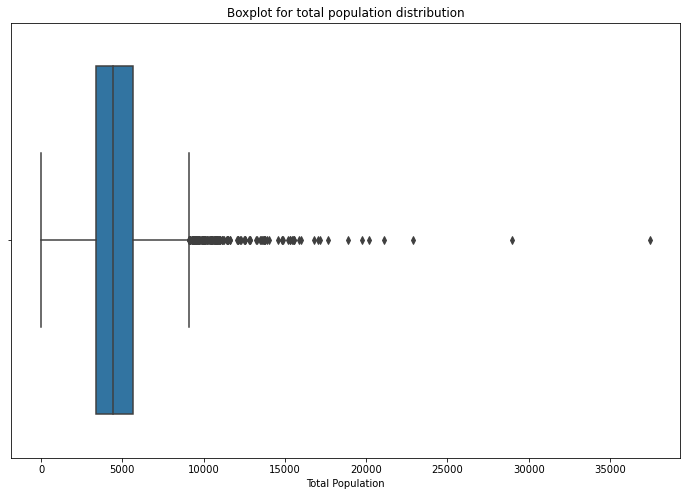

In [137]:
sns.boxplot(data = cal, x= 'Total Population')
plt.title('Boxplot for total population distribution')
plt.gcf().set_size_inches(12,8)
plt.show()

This graph is particularly interesting because it is not intuitive. More poverty usually results in less education, however I believe that since there are more people in poverty areas closer together it would result in more children who actively go to school.

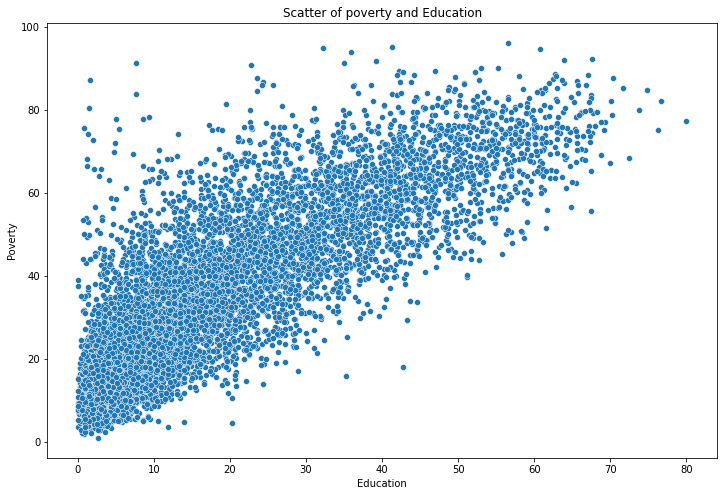

In [138]:
sns.scatterplot(x='Education', y = 'Poverty', data = cal)
plt.title('Scatter of poverty and Education')
plt.gcf().set_size_inches(12,8)
plt.show()

- I am looking so heavily at SB 535 Disadvantaged Community because it is binary and also stands for a impoverished community. Which in turn allows me to have some inference into the poverty metric.

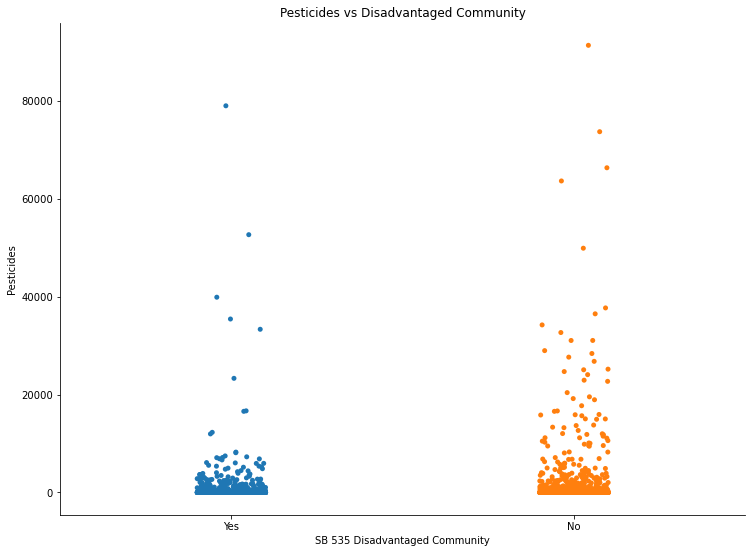

In [139]:
#sns.scatterplot(x= 'Total Population', y ='Pesticides', data = cal, hue="SB 535 Disadvantaged Community")
sns.catplot(y ='Pesticides', data = cal, x="SB 535 Disadvantaged Community")
plt.gcf().set_size_inches(12,8)
plt.title('Pesticides vs Disadvantaged Community')
plt.show()

Seeing the gap at the bottom of 'Yes' suggests that there are many cases that start at atleast 50 cases per 10k population as opposed to the 'No' catagory which has many more cases with almost no incidences.

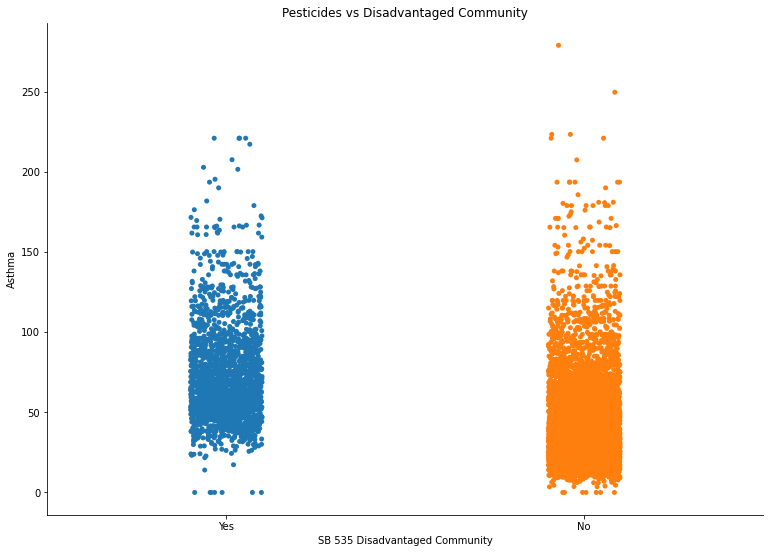

In [226]:
sns.catplot(y ='Asthma', data = cal, x="SB 535 Disadvantaged Community")
plt.gcf().set_size_inches(12,8)
plt.title('Pesticides vs Disadvantaged Community')
plt.show()

Asthma and disadvantageous communities show to be connected as more of the blue dots are higher up on the asthma scale. ALso the pollution burden is higher for these aforementioned communities aswell. 

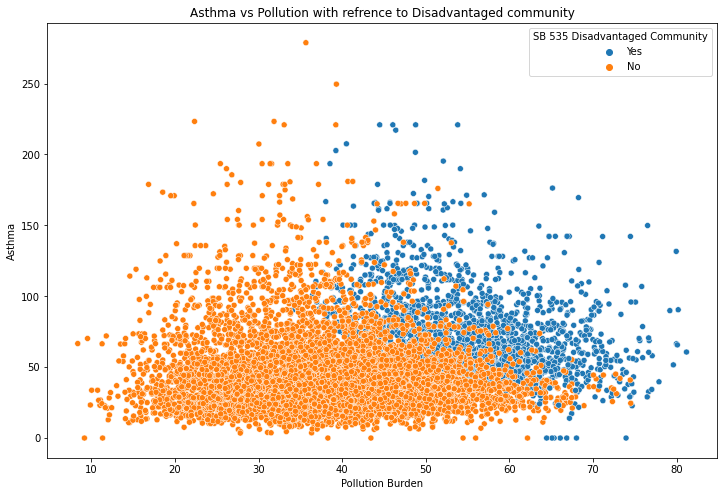

In [140]:
sns.scatterplot(x= 'Pollution Burden', y ='Asthma', data = cal, hue="SB 535 Disadvantaged Community")
plt.title('Asthma vs Pollution with refrence to Disadvantaged community')
plt.gcf().set_size_inches(12,8)
plt.show()

Comparison of SB 535 and Poverty against the same health and pollution metrics(Pollution burden & Asthma)

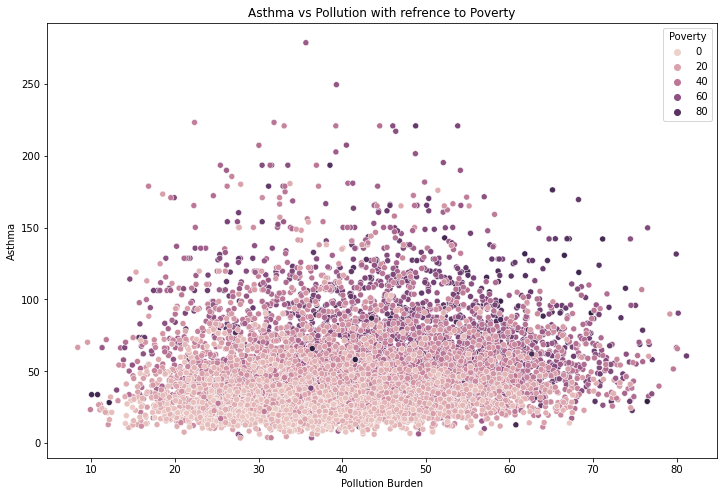

In [228]:
sns.scatterplot(x= 'Pollution Burden', y ='Asthma', data = cal, hue="Poverty")
plt.title('Asthma vs Pollution with refrence to Poverty')
plt.gcf().set_size_inches(12,8)
plt.show()

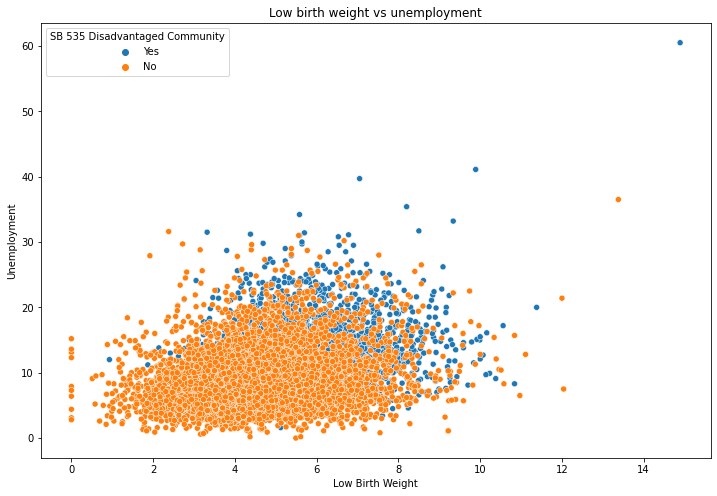

In [141]:
sns.scatterplot(x= 'Low Birth Weight', y ='Unemployment', data = cal, hue="SB 535 Disadvantaged Community")
plt.gcf().set_size_inches(12,8)
plt.title('Low birth weight vs unemployment')
plt.show()

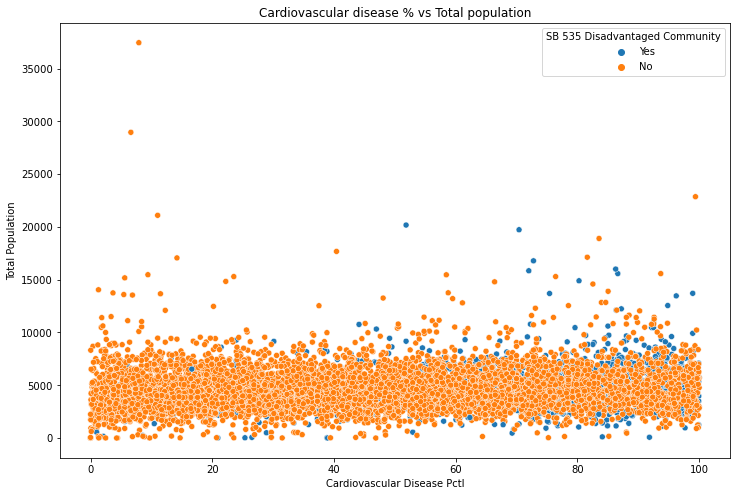

In [142]:
sns.scatterplot(x= 'Cardiovascular Disease Pctl', y ='Total Population', data = cal, hue="SB 535 Disadvantaged Community")
plt.gcf().set_size_inches(12,8)
plt.title('Cardiovascular disease % vs Total population')
plt.show()

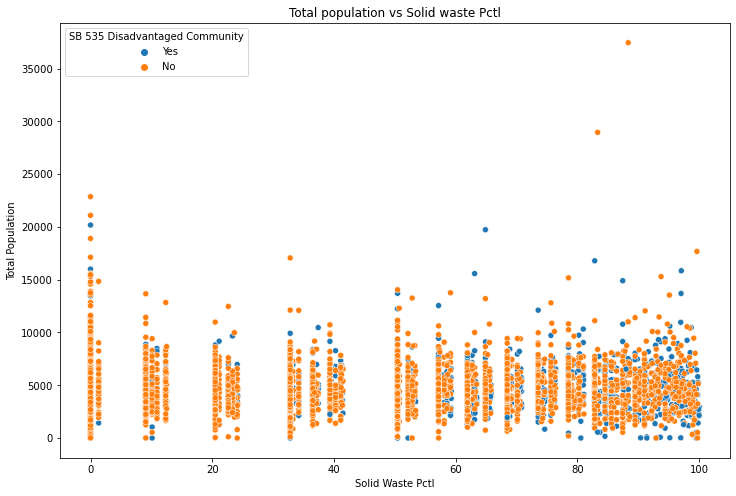

In [143]:
sns.scatterplot(x= 'Solid Waste Pctl', y ='Total Population', data = cal, hue="SB 535 Disadvantaged Community")
plt.gcf().set_size_inches(12,8)
plt.title('Total population vs Solid waste Pctl')
plt.show()

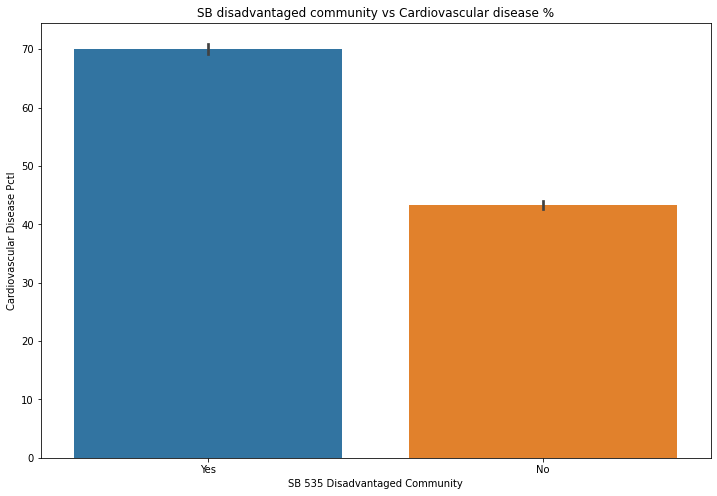

In [144]:
sns.barplot(y ='Cardiovascular Disease Pctl', data = cal, x="SB 535 Disadvantaged Community")
plt.gcf().set_size_inches(12,8)
plt.title('SB disadvantaged community vs Cardiovascular disease %')
plt.show()

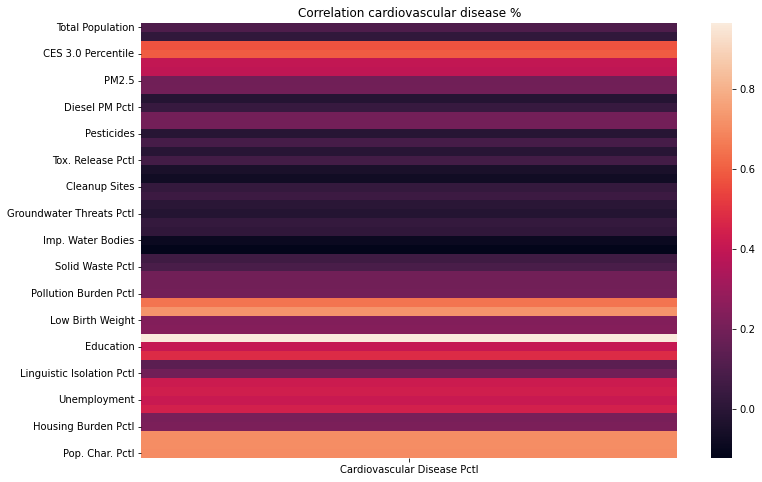

In [145]:
sns.heatmap(cal.corr()[['Cardiovascular Disease Pctl']].drop(['Cardiovascular Disease Pctl','Longitude','Census Tract','Latitude']))
plt.gcf().set_size_inches(12,8)
plt.title('Correlation cardiovascular disease %')
plt.show()

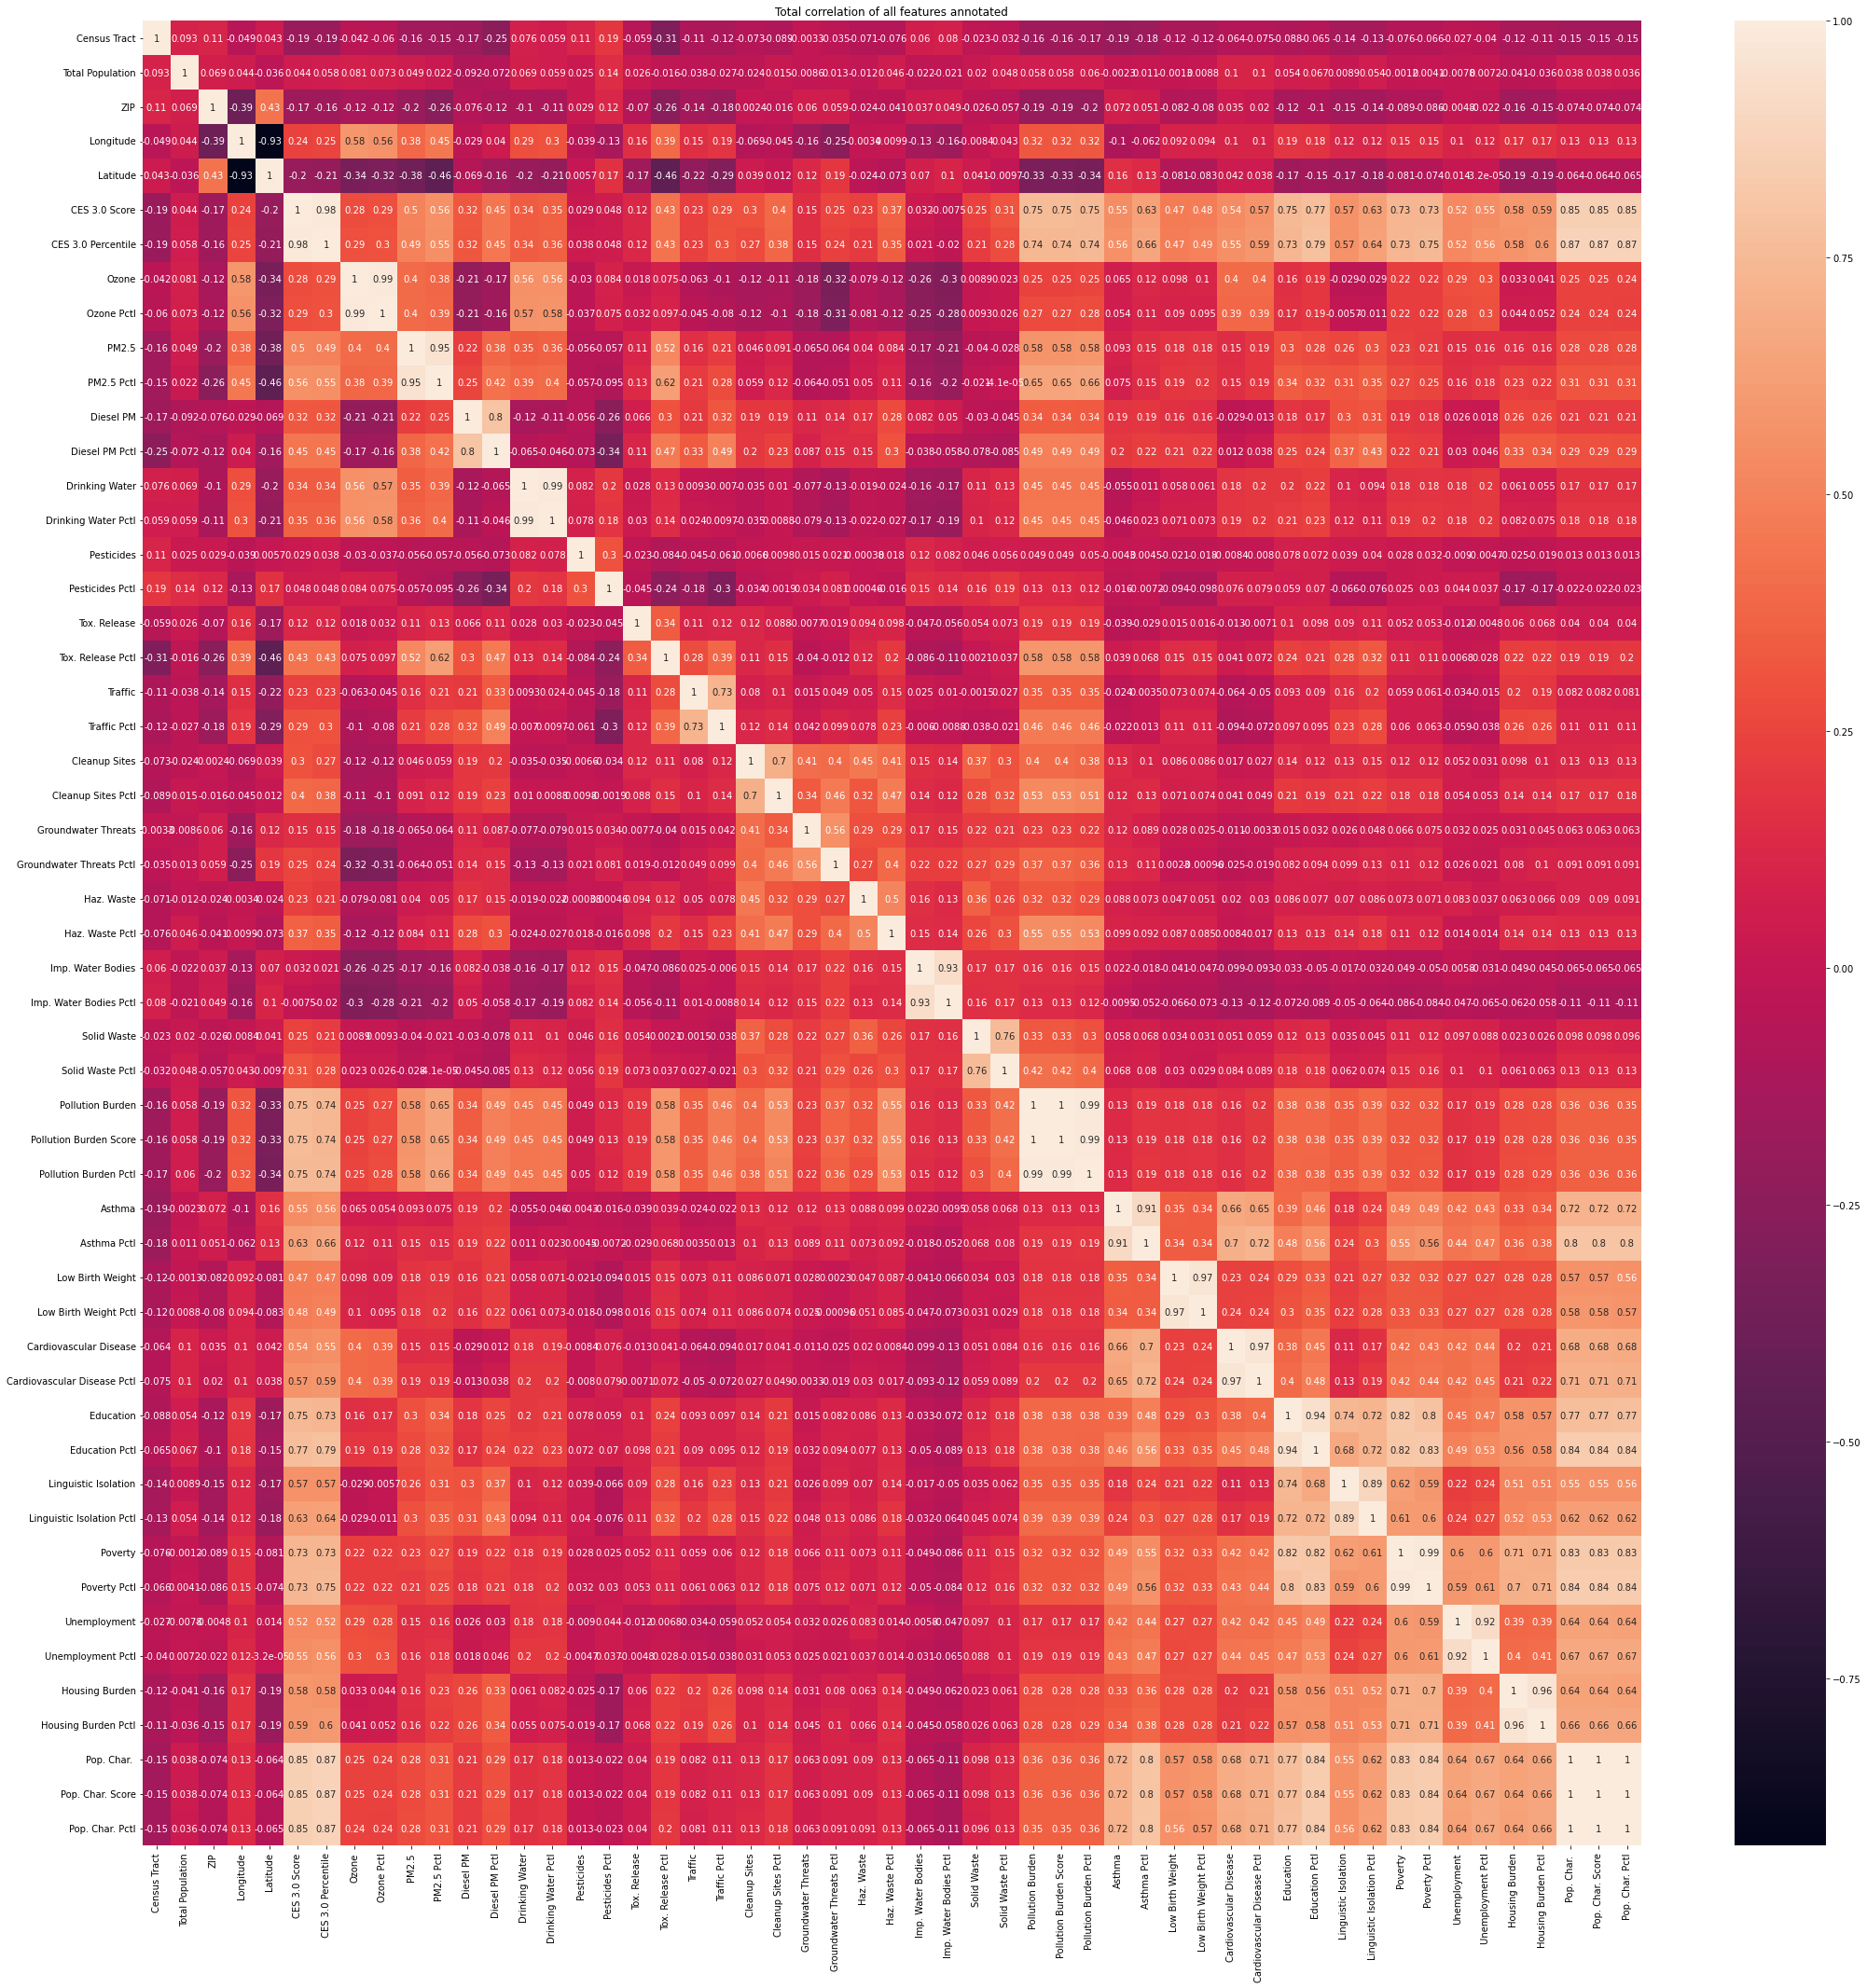

In [146]:
plt.subplots(1,1, figsize=(36,36))
sns.heatmap(cal.corr(), annot= True)
plt.title('Total correlation of all features annotated')
plt.show()

In [147]:
#### list highest correlated for use in pairplot below

In [148]:
corr=cal.corr

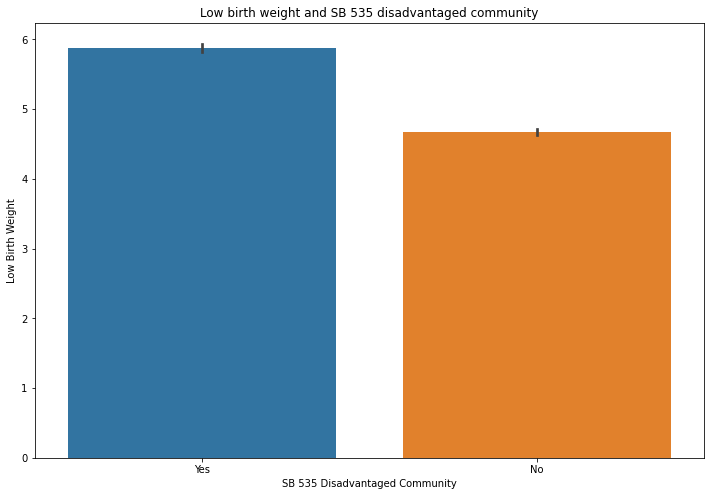

In [149]:
sns.barplot(y ='Low Birth Weight', data = cal, x="SB 535 Disadvantaged Community")
plt.gcf().set_size_inches(12,8)
plt.title('Low birth weight and SB 535 disadvantaged community')
plt.show()

Text(0.5, 1.0, 'Asthma and SB 535 disadvantaged community')

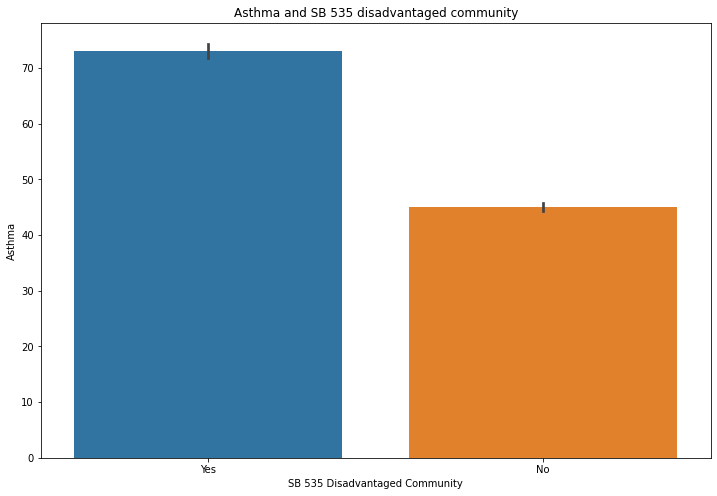

In [150]:
sns.barplot(y ='Asthma', data = cal, x="SB 535 Disadvantaged Community")
plt.gcf().set_size_inches(12,8)
plt.title('Asthma and SB 535 disadvantaged community')

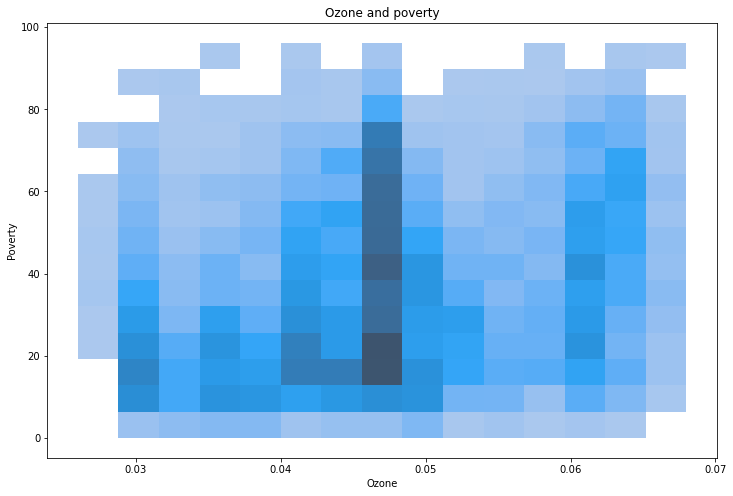

In [151]:
sns.histplot(data = cal, x = 'Ozone', y = 'Poverty', bins = 15, palette='rgb')
plt.gcf().set_size_inches(12,8)
plt.title('Ozone and poverty')
plt.show()

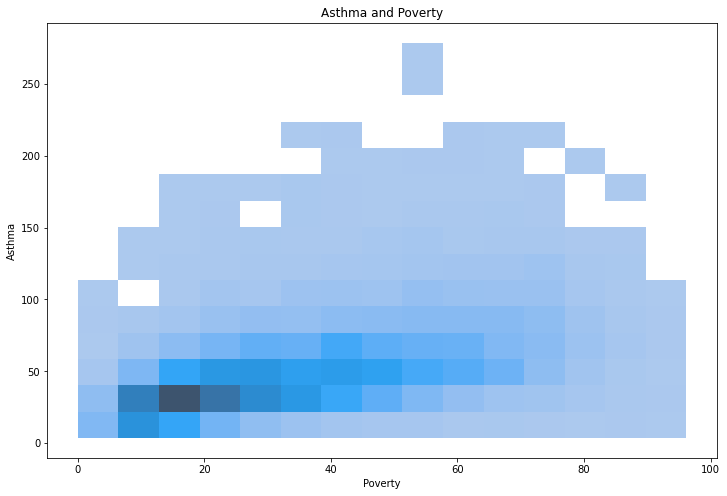

In [152]:
sns.histplot(data = cal, x = 'Poverty', y = 'Asthma', bins = 15, palette='rgb')
plt.gcf().set_size_inches(12,8)
plt.title('Asthma and Poverty')
plt.show()

In [153]:
pct_missing = cal.isna().mean()
pct_missing

Census Tract                                         0.000000
Total Population                                     0.000000
California County                                    0.000000
ZIP                                                  0.000000
Nearby City \n(to help approximate location only)    0.000000
                                                       ...   
Housing Burden                                       0.019540
Housing Burden Pctl                                  0.019540
Pop. Char.                                           0.013192
Pop. Char. Score                                     0.013192
Pop. Char. Pctl                                      0.013192
Length: 57, dtype: float64

## Pairplot with features to explore their interaction(Not the best graph)

In [154]:

exp = cal[['CES 3.0 Score', 'Education', 'Low Birth Weight', 'Pollution Burden', 'Traffic', 'Pesticides', 'Housing Burden',
           'Ozone', 'Asthma']]

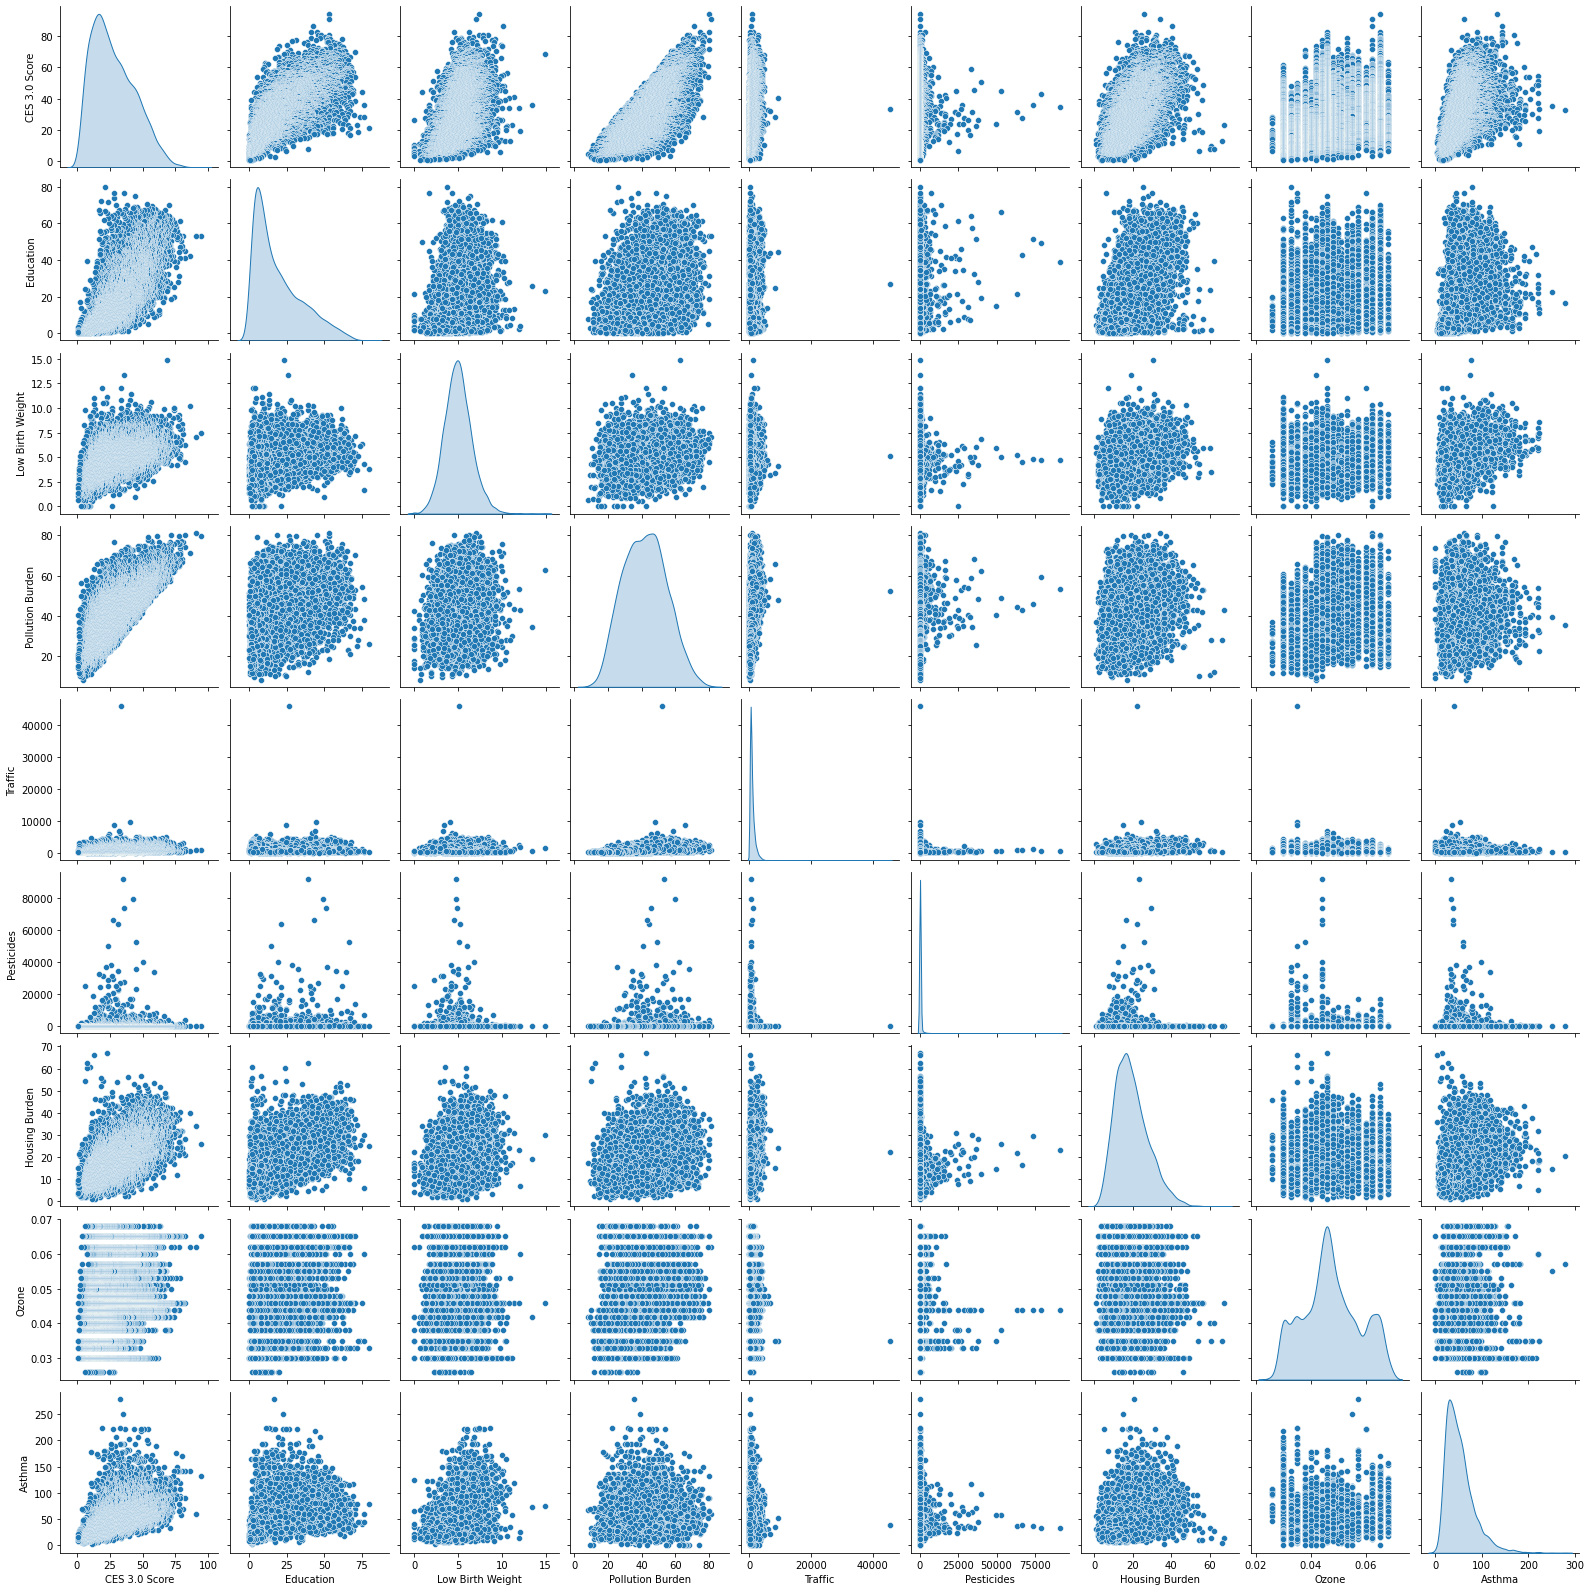

In [155]:
sns.pairplot(data=exp, diag_kind='kde')

### New pairplot with less features

In [156]:
exp2 = cal[['CES 3.0 Score', 'Education', 'Low Birth Weight', 'Housing Burden',
           'Ozone', 'Asthma']]

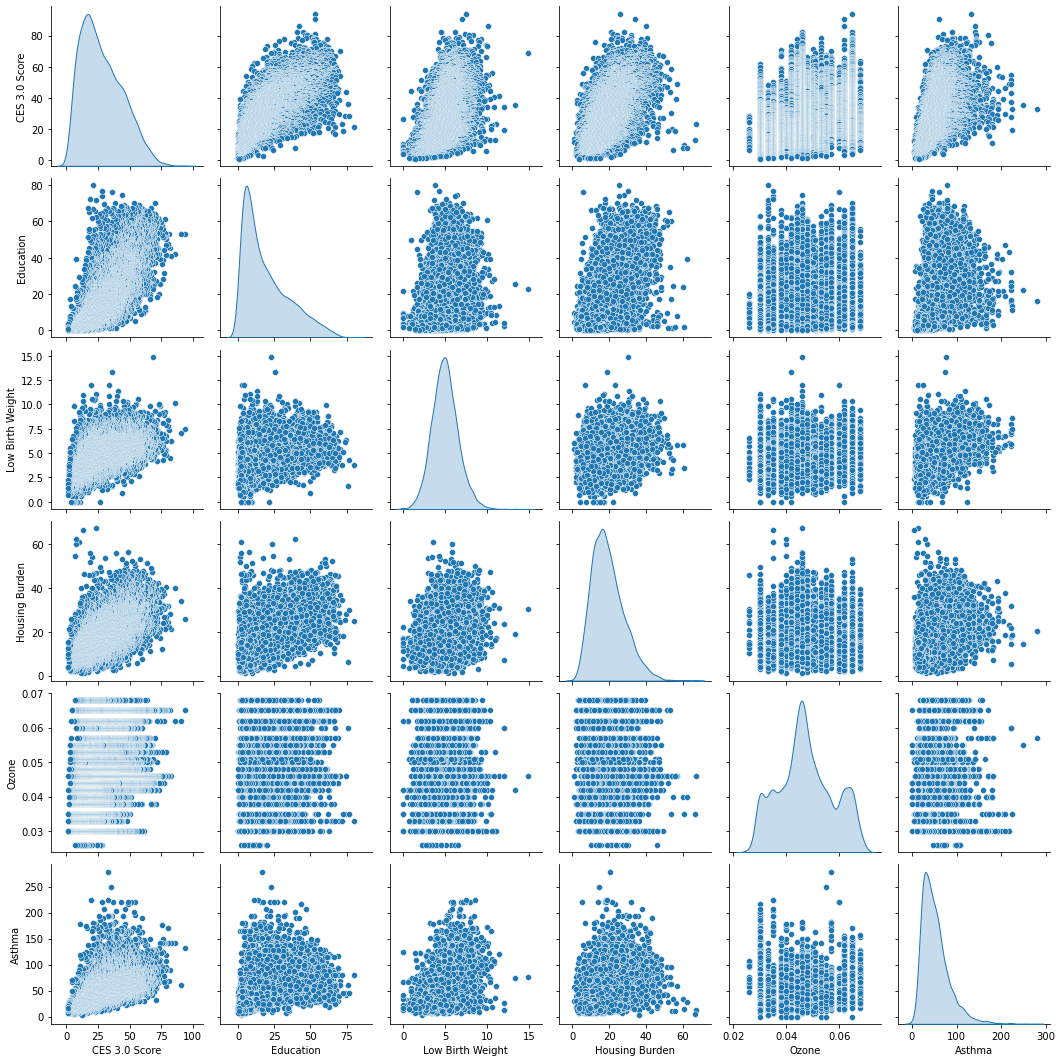

In [157]:
sns.pairplot(data=exp2, diag_kind='kde')

## Rudementary models and MSE, First SVR

In [158]:
X = cal[['Total Population', 'Poverty', 'Education', 'Pollution Burden', 'Solid Waste', 
       'Haz. Waste', 'Traffic', 'Pesticides', 'Diesel PM', 'Ozone', 'SB 535 Disadvantaged Community']]
y = cal['Asthma Pctl']

In [159]:
X=pd.get_dummies(X)
X=X.fillna(X.median()) #fill with median value

In [160]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [161]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [162]:
train_preds =  svr.predict(X_train)
test_preds= svr.predict(X_test)

In [163]:
print(f'Train error: {mean_squared_error(y_train,train_preds)}')
print(f'Test error: {mean_squared_error(y_test,test_preds)}')

svr.score(X_train,y_train)

Train error: 821.9403587982769
Test error: 840.5983562811261


0.012699720090386335

#### Changing to Asthma rather than Percentile

In [214]:
X = cal[['Total Population', 'Poverty', 'Education', 'Pollution Burden', 'Solid Waste', 
       'Haz. Waste', 'Traffic', 'Pesticides', 'Diesel PM', 'Ozone', 'SB 535 Disadvantaged Community']]
y = cal['Asthma Pctl']

In [215]:
X=pd.get_dummies(X)
X=X.fillna(X.median()) #fill with median value

In [216]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [217]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [218]:
train_preds =  svr.predict(X_train)
test_preds= svr.predict(X_test)

In [219]:
print(f'Train error: {mean_squared_error(y_train,train_preds)}')
print(f'Test error: {mean_squared_error(y_test,test_preds)}')

svr.score(X_train,y_train)

Train error: 821.9403587982769
Test error: 840.5983562811261


0.012699720090386335

#### ^horrible score with selected features need to improve.

In [170]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Census Tract                                      8035 non-null   int64  
 1   Total Population                                  8035 non-null   int64  
 2   California County                                 8035 non-null   object 
 3   ZIP                                               8035 non-null   int64  
 4   Nearby City 
(to help approximate location only)  8035 non-null   object 
 5   Longitude                                         8035 non-null   float64
 6   Latitude                                          8035 non-null   float64
 7   CES 3.0 Score                                     7929 non-null   float64
 8    CES 3.0 Percentile                               7929 non-null   float64
 9   CES 3.0 
Percentile

In [171]:
X = cal[['CES 3.0 Score', 'Low Birth Weight', 'Cardiovascular Disease', 'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden']]
y = cal['Asthma Pctl']

In [172]:
X=pd.get_dummies(X)
X=X.fillna(X.median())

In [173]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [174]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [175]:
train_preds =  svr.predict(X_train)
test_preds= svr.predict(X_test)

In [176]:
print(f'Train error: {mean_squared_error(y_train,train_preds)}')
print(f'Test error: {mean_squared_error(y_test,test_preds)}')

svr.score(X_train,y_train)

Train error: 352.37896448959117
Test error: 356.5166644680112


0.5767285952675592

#### ^Big improvement with selecting better features but still very bad. Need to use more features.

## Lasso model regression try

In [177]:
X = cal[['CES 3.0 Score', 'Low Birth Weight', 'Cardiovascular Disease', 'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden']]
y = cal['Asthma Pctl']

In [178]:
X=pd.get_dummies(X)
X=X.fillna(X.median())

In [179]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [180]:
las = Lasso()
las.fit(X_train, y_train)

Lasso()

In [181]:
train_preds =  las.predict(X_train)
test_preds= las.predict(X_test)

In [182]:
print(f'Train error: {mean_squared_error(y_train,train_preds)}')
print(f'Test error: {mean_squared_error(y_test,test_preds)}')

las.score(X_train,y_train)

Train error: 334.47872655648945
Test error: 328.0866835713292


0.5982300457470547

## Ridge Model regression try

In [183]:
X = cal[['CES 3.0 Score', 'Low Birth Weight', 'Cardiovascular Disease', 'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden']]
y = cal['Asthma Pctl']

In [184]:
X=pd.get_dummies(X)
X=X.fillna(X.median())

In [185]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [186]:
rid = Ridge()
rid.fit(X_train, y_train)

Ridge()

In [187]:
train_preds =  rid.predict(X_train)
test_preds= rid.predict(X_test)

In [188]:
print(f'Train error: {mean_squared_error(y_train,train_preds)}')
print(f'Test error: {mean_squared_error(y_test,test_preds)}')

rid.score(X_train,y_train)

Train error: 333.792290399288
Test error: 326.26871194297405


0.5990545807670116

### Best model out of this initial batch (Ridge) changing to predict Asthma not Asthma pctl

In [220]:
X = cal[['CES 3.0 Score', 'Low Birth Weight', 'Cardiovascular Disease', 'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden']]
y = cal['Asthma']

In [221]:
X=pd.get_dummies(X)
X=X.fillna(X.median())

In [222]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [223]:
rid = Ridge()
rid.fit(X_train, y_train)

Ridge()

In [224]:
train_preds =  rid.predict(X_train)
test_preds= rid.predict(X_test)

In [225]:
print(f'Train error: {mean_squared_error(y_train,train_preds)}')
print(f'Test error: {mean_squared_error(y_test,test_preds)}')

rid.score(X_train,y_train)

Train error: 455.1459601367366
Test error: 398.2881401406267


0.5135424478309926

Im going to increase features by merging the datasets.

# Merging all Cal Enviroscreen datasets into one dataset with intersect

- This was my version of bringing all the Enviromental data into one CSV

- Later on the merged dataset we would use as a team was decided to be the one with all merged warehouse data and without any dropped columns.

In [189]:
# cal is enviroscreen 3
cal['origin']= '2018 update'
cal2 = pd.read_csv('../../raw_data/calenviroscreen2-final-report.csv')
cal2['origin']='2014 update'


In [190]:
cal4 = pd.read_excel('../../raw_data/calenviroscreen40resultsdatadictionary_F_2021.xlsx')
cal4['origin']= '2021 update'

In [191]:
cal1 = pd.read_excel('../../raw_data/calenviroscreendatav11.xls')
cal1['origin']= '2013 update'

In [192]:
len(cal1.columns)

43

In [193]:
len(cal.columns)

58

In [194]:
len(cal2.columns)

53

In [195]:
len(cal4.columns)

59

#### ^tons of uneven column types within the Enviroscreen 1-4 dataset

##### I wanted to intersect on shared columns to create the cleanest dataset, i realize this might impact the data integrity.

In [196]:
all_enviro = pd.concat([cal, cal2, cal4, cal1])



In [197]:
pd.set_option('display.max_rows',30)

In [198]:
all_enviro.isnull().sum()

Census Tract                                          1769
Total Population                                         0
California County                                     1769
ZIP                                                   9804
Nearby City \n(to help approximate location only)    17839
                                                     ...  
ZIP Code                                             24105
TRI                                                  24105
TRI Pctl                                             24105
CES 1.1 Score                                        24115
CES 1.1 Percentile Range                             24115
Length: 76, dtype: int64

In [199]:
group1 = set(cal1.columns).intersection(set(cal.columns))

In [200]:
group2 = set(cal2.columns).intersection(set(cal4.columns))

In [201]:
shared_columns=group1.intersection(group2)
shared_columns

{'Asthma',
 'Asthma Pctl',
 'Cleanup Sites',
 'Cleanup Sites Pctl',
 'Diesel PM',
 'Diesel PM Pctl',
 'Education',
 'Education Pctl',
 'Groundwater Threats',
 'Groundwater Threats Pctl',
 'Haz. Waste',
 'Haz. Waste Pctl',
 'Imp. Water Bodies',
 'Imp. Water Bodies Pctl',
 'Linguistic Isolation',
 'Linguistic Isolation Pctl',
 'Low Birth Weight',
 'Low Birth Weight Pctl',
 'Ozone',
 'Ozone Pctl',
 'PM2.5',
 'PM2.5 Pctl',
 'Pesticides',
 'Pesticides Pctl',
 'Pollution Burden',
 'Pollution Burden Score',
 'Pop. Char. ',
 'Pop. Char. Score',
 'Poverty',
 'Poverty Pctl',
 'Solid Waste',
 'Solid Waste Pctl',
 'Total Population',
 'Traffic',
 'Traffic Pctl',
 'origin'}

In [202]:
all_enviro=all_enviro[all_enviro.columns[all_enviro.columns.isin(shared_columns)]]

In [203]:
all_enviro.head()

Total Population  Ozone  Ozone Pctl  PM2.5  PM2.5 Pctl  Diesel PM  \
0              3174  0.065       98.18  15.40       97.22     48.524   
1              6133  0.062       91.10  13.31       93.64     38.556   
2              3167  0.062       91.10  15.40       97.22     47.445   
3              6692  0.046       53.02  12.54       84.02     24.117   
4              2206  0.065       98.18  15.40       97.22     18.846   

   Diesel PM Pctl  Pesticides  Pesticides Pctl  Traffic  ...  \
0           95.54        2.75            47.82   909.14  ...   
1           92.12        1.37            41.34   782.26  ...   
2           95.42        3.03            48.75   576.52  ...   
3           73.52       12.93            60.56  1305.01  ...   
4           58.22     3518.41            95.15   435.16  ...   

   Low Birth Weight Pctl  Education  Education Pctl  Linguistic Isolation  \
0                  93.84       53.3           95.76                  16.2   
1                  90.85       53.3           95.76                  33.4   
2                  99.78       42.3           89.06                  16.7   
3                  80.65       40.8           87.52                  15.3   
4                  38.92       45.1           91.13                  14.7   

   Linguistic Isolation Pctl  Poverty  Poverty Pctl  Pop. Char.   \
0                      77.51     76.3         97.12        92.12   
1                      96.25     72.5         94.63        87.44   
2                      78.39     86.8         99.56        94.58   
3                      75.14     61.3         85.57        86.70   
4                      73.72     66.4         90.23        80.08   

   Pop. Char. Score       origin  
0              9.55  2018 update  
1              9.07  2018 update  
2              9.81  2018 update  
3              8.99  2018 update  
4              8.30  2018 update  

[5 rows x 36 columns]

In [204]:
all_enviro.isnull().sum()

Total Population      0
Ozone               203
Ozone Pctl          203
PM2.5               246
PM2.5 Pctl          246
                   ... 
Poverty             397
Poverty Pctl        397
Pop. Char.          281
Pop. Char. Score    281
origin                0
Length: 36, dtype: int64

In [205]:
#all_enviro.dropna(inplace=True)

# No dropping nulls although it is tempting

In [206]:
all_enviro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25874 entries, 0 to 1768
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total Population           25874 non-null  int64  
 1   Ozone                      25671 non-null  float64
 2   Ozone Pctl                 25671 non-null  float64
 3   PM2.5                      25628 non-null  float64
 4   PM2.5 Pctl                 25628 non-null  float64
 5   Diesel PM                  25874 non-null  float64
 6   Diesel PM Pctl             25874 non-null  float64
 7   Pesticides                 25874 non-null  float64
 8   Pesticides Pctl            25874 non-null  float64
 9   Traffic                    25783 non-null  float64
 10  Traffic Pctl               25783 non-null  float64
 11  Cleanup Sites              25874 non-null  float64
 12  Cleanup Sites Pctl         25874 non-null  float64
 13  Groundwater Threats        25874 non-null  floa

In [207]:
all_enviro.to_csv('All_enviroscreen_data.csv')

### Distribution of how much data is in each dataset, 2013 dataset was much less than any of the rest of the data collected.

In [208]:
all_enviro['origin'].value_counts(normalize = True)

2018 update    0.310543
2014 update    0.310543
2021 update    0.310543
2013 update    0.068370
Name: origin, dtype: float64

In [209]:
all_enviro.isnull().sum()

Total Population      0
Ozone               203
Ozone Pctl          203
PM2.5               246
PM2.5 Pctl          246
                   ... 
Poverty             397
Poverty Pctl        397
Pop. Char.          281
Pop. Char. Score    281
origin                0
Length: 36, dtype: int64

In [210]:
#sns.pairplot(data=cal, diag_kind='kde')

## Room for EDA of Enviroscreen 1 & 2

#### (even though it was taken care of by david and Giovanna)

## Future sketches of tuning of models (will move to the Initial models page)

### Grid search CV

In [211]:
params = {'n_estimators':[100,500],
         'min_samples_leaf':[1,2,3],
         'min_samples_split':[2,3,4]
         }
gs=GridSearchCV(RandomForestRegressor(),params,n_jobs=-1,verbose=True,cv=3)
gs.fit(counts,y_train)

NameError: name 'GridSearchCV' is not defined

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values('Asthma',ascending=True)


## fit to best params

In [ ]:
rf=RandomForestRegressor(**gs.best_params_)
rf.fit(counts,y_train)

### This is just a skeleton, I will tune ASAP

In [ ]:
print(f'Train score: {rf.score(counts,y_train)}')

counts_test = tfidf.transform(X_test[''])
print(f'Test score {rf.score(counts_test,y_test)}')
RF3 = rf.score(counts_test,y_test)

## Bootstrap method

In [ ]:
X= df.drop('',axis=1)
y= df['']

X_train, X_test, y_train, y_test = train_test_split(X,y)

X_bs = X_train.copy() #make bootstrap df
X_bs['']=y_train 
d=y_train.value_counts(normalize=True).to_dict()


X_bs['weight']=X_bs[''].map(d) #perform inverse weighting so sampling comes out even
X_bs=X_bs.sample(frac=1,replace=True,weights='weight') #sample using replacement

#cleanup
y_bs = X_bs['all_processed_data']
X_bs = X_bs.drop(['','weight'],axis=1)